In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import nltk.corpus
from wordcloud import WordCloud
import seaborn as sns

[nltk_data] Downloading package punkt to /home/jg6617/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jg6617/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [220]:
#load data
yelp = pd.read_csv('yelp_business.csv')
review = pd.read_csv('yelp_review.csv')

#Select all restaurants
res = yelp[yelp.categories.str.contains('Food|food|FOOD|restaurant|Restaurant')]
y_review = pd.merge(review,res[['business_id','city','state','categories']],on = 'business_id')

In [221]:
#Take most recent reviews
y_review['date'] = pd.to_datetime(y_review.date.values)
date = pd.to_datetime("Jan 1th 2017")
review = y_review[y_review.date >= date]

# Rate 5.0 and 1.0

In [222]:
#Take reviews with 5 stars and 1 stars
review_5s = review[review.stars == 5].text
review_1s = review[review.stars == 1].text

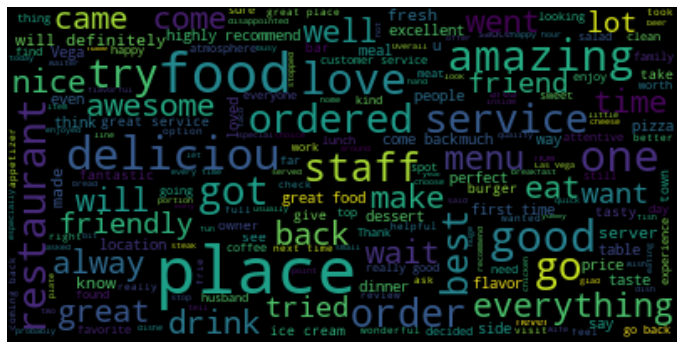

In [223]:
#Visualize most frequent words for star 5
all_text_5s = ' '.join(review_5s)
wordcloud_5s = WordCloud(max_font_size=40).generate(all_text_5s)

plt.figure(figsize = (12,12))
plt.imshow(wordcloud_5s, interpolation="bilinear")
plt.axis("off")
plt.show()

In [227]:
def get_frequency(text):
    """This function take the text need to be tokenized as an input and return a list of frequency of words.
    """
    #Tokenize the lower case
    words = nltk.word_tokenize(text.lower())
    
    #Remove stopwords
    stopwords = nltk.corpus.stopwords.words("english")+['would','get','back','go','really','us',
                                                        'going','like','one','food','place','really',
                                                       'could','got','also','experience','come','came',
                                                       'went','first','also','good','know']
    words = [w for w in words if w not in stopwords]
    
    #Get frequency
    fq = nltk.FreqDist(w for w in words if w.isalnum())
    return fq

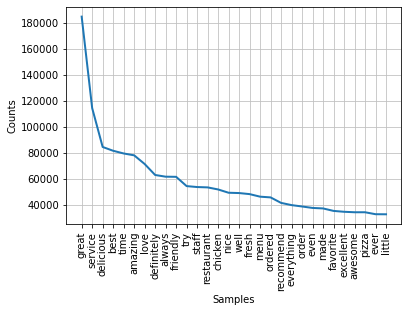

In [228]:
#Plot the ranking frequence for star 5
fq_all = get_frequency(all_text_5s)
fq_all.plot(30)

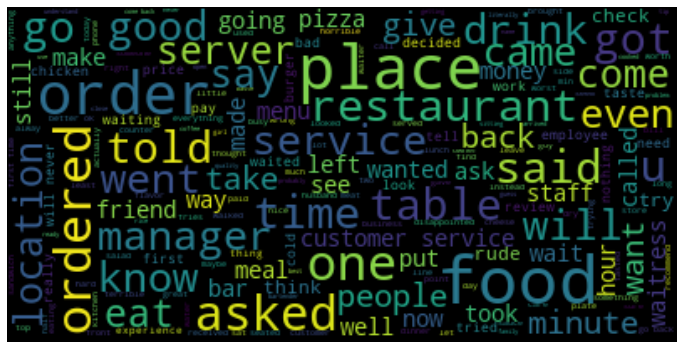

In [229]:
#Visualize most frequent words for star 1
all_text_1s = ' '.join(review_1s)
wordcloud_1s = WordCloud(max_font_size=40).generate(all_text_1s)

plt.figure(figsize = (12,12))
plt.imshow(wordcloud_1s, interpolation="bilinear")
plt.axis("off")
plt.show()

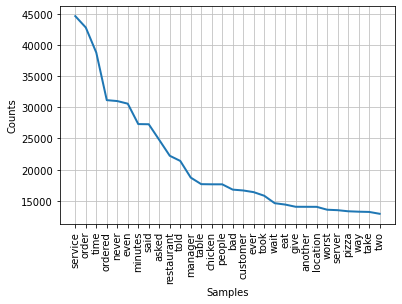

In [230]:
#Plot the ranking frequence for star 1
fq_all = get_frequency(all_text_1s)
fq_all.plot(30)

# Study best restaurant and worst restaurant

In [231]:
#Restaurant receive most 5 stars
review_5star = y_review[y_review.stars == 5]
review_5star.groupby('business_id')['stars'].count().sort_values(ascending = False).head(6)

business_id
4JNXUYY8wbaaDmk3BPzlWw    3280
RESDUcs7fIiihp38-d6_6g    2725
DkYS3arLOhA8si5uUEmHOw    2443
hihud--QRriCYZw1zZvW4g    2280
cYwJA2A6I12KNkm2rtXd5g    2198
KskYqH1Bi7Z_61pH6Om8pg    2162
Name: stars, dtype: int64

In [232]:
#Their average stars
top_6 = review_5star.groupby('business_id')['stars'].count().sort_values(ascending = False).head(6).index
y_review[y_review.business_id.isin(top_6)].groupby('business_id')['stars'].mean()

business_id
4JNXUYY8wbaaDmk3BPzlWw    4.120484
DkYS3arLOhA8si5uUEmHOw    4.268994
KskYqH1Bi7Z_61pH6Om8pg    4.227995
RESDUcs7fIiihp38-d6_6g    3.770340
cYwJA2A6I12KNkm2rtXd5g    3.893722
hihud--QRriCYZw1zZvW4g    4.549632
Name: stars, dtype: float64

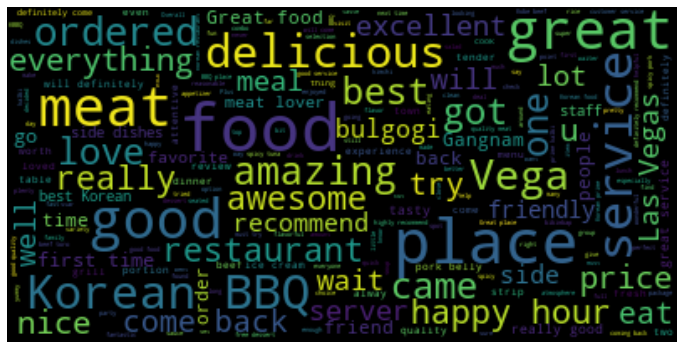

In [243]:
best = y_review[y_review.business_id == 'hihud--QRriCYZw1zZvW4g']

#Visualize most frequent words for the best restaurant
best_text = ' '.join(best[best.stars == 5].text)
best_text_wd = WordCloud(max_font_size=40).generate(best_text)

plt.figure(figsize = (12,12))
plt.imshow(best_text_wd, interpolation="bilinear")
plt.axis("off")
plt.show()

In [236]:
pd.set_option('display.max_colwidth',1)
best[best.stars == 1].head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,city,state,categories
519678,Oxhy2uXkLinvDVe6Mux-Sw,MOxfE9V_yHaN5ZgfSk1t4g,hihud--QRriCYZw1zZvW4g,1,2015-11-15,"So came here for Lunch on a Saturday. Food was okay. However, the service was absolutely horrendous. They weren't very busy at all. It took 45 minutes to bring out our beef toro and we asked about it twice, and they said the kitchen is still slicing it. We ordered combo fried rice and specifically said only chicken and beef. They brought it out with shrimp too, and when we told them, our sever said he'll just take out the shrimp for us. Umm.. No.. The rice tastes like shrimp now. Overall service was horrible, has to request more water 3 times, request for the grill to be changed, request for my check after waiting 15 minutes.\n\nThe reviews on YELP are totally FAKE because they offer a free dessert if you review them. No body is going to show them a 1 star review to get a dessert.\n\nDefinitely do not recommend.",0,0,0,Las Vegas,NV,Asian Fusion;Restaurants;Barbeque;Korean;Tapas/Small Plates;Japanese
519704,BHo81rRKLfn4X1GaV9QPwg,Bw9Xlh7M84gY1kBfPZFUxQ,hihud--QRriCYZw1zZvW4g,1,2016-04-13,Server told us to hurry up just as we were finish eating because there was a reservation. That's not our problem. That's very rude whether you are a server or not. Never coming here again and telling everyone about this bad service,2,0,0,Las Vegas,NV,Asian Fusion;Restaurants;Barbeque;Korean;Tapas/Small Plates;Japanese
519725,GNaRj3G-1l0v5CcjwbHkzg,BKrJUkm8weTBm069zKUZgw,hihud--QRriCYZw1zZvW4g,1,2016-07-22,I haven't been able to try the food due to the overwhelming long line of 90 plus minute wait time. Just not worth the wait in Vegas! 1 star for the long wait. I would give it no star but that's not an option.,0,0,0,Las Vegas,NV,Asian Fusion;Restaurants;Barbeque;Korean;Tapas/Small Plates;Japanese


In [237]:
#Restaurant receive most 1 stars
review_1star = y_review[y_review.stars == 1]
review_1star.groupby('business_id')['stars'].count().sort_values(ascending = False).head(6)

business_id
El4FC8jcawUVgw_0EIcbaQ    758
RESDUcs7fIiihp38-d6_6g    669
X8c23dur0ll2D9XTu-I8Qg    583
eoHdUeQDNgQ6WYEnP2aiRw    571
JpgVl3d20CMRNjf1DVnzGA    478
4GXII-GU7S0ZyU6ElkhscQ    473
Name: stars, dtype: int64

In [238]:
#Their average stars
worst_6 = review_1star.groupby('business_id')['stars'].count().sort_values(ascending = False).head(6).index
y_review[y_review.business_id.isin(worst_6)].groupby('business_id')['stars'].mean()

business_id
4GXII-GU7S0ZyU6ElkhscQ    2.365817
El4FC8jcawUVgw_0EIcbaQ    2.994485
JpgVl3d20CMRNjf1DVnzGA    3.014144
RESDUcs7fIiihp38-d6_6g    3.770340
X8c23dur0ll2D9XTu-I8Qg    2.569298
eoHdUeQDNgQ6WYEnP2aiRw    3.056252
Name: stars, dtype: float64

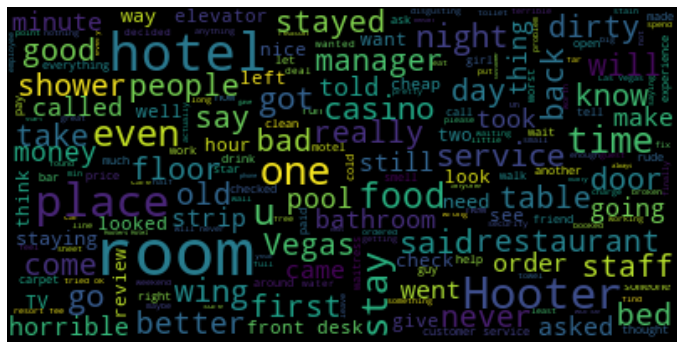

In [242]:
worst = y_review[y_review.business_id == '4GXII-GU7S0ZyU6ElkhscQ']

#Visualize most frequent words for the worst restaurant
worst_text = ' '.join(worst[worst.stars == 1].text)
worst_text_wd = WordCloud(max_font_size=40).generate(worst_text)

plt.figure(figsize = (12,12))
plt.imshow(worst_text_wd, interpolation="bilinear")
plt.axis("off")
plt.show()

# Mexican  Food

In [249]:
mexican_food = y_review[y_review.categories.str.contains('Mexican|Mexicans|mexican|mexicans')]

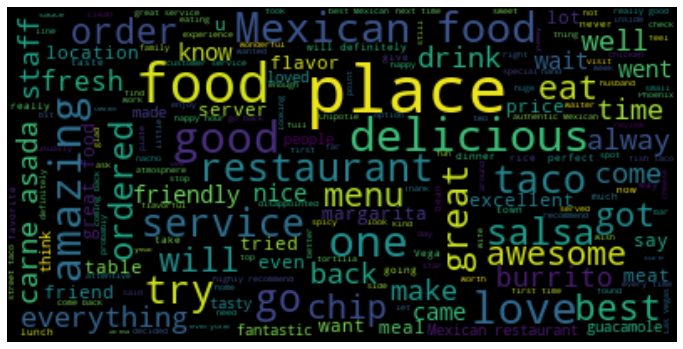

In [250]:
#Visualize most frequent words for the best restaurant
mexican_text = ' '.join(mexican_food[mexican_food.stars == 5].text)
mexican_text_wd = WordCloud(max_font_size=40).generate(mexican_text)

plt.figure(figsize = (12,12))
plt.imshow(mexican_text_wd, interpolation="bilinear")
plt.axis("off")
plt.show()

In [252]:
pizza = y_review[y_review.categories.str.contains('pizza|Pizza|PIZZA')]

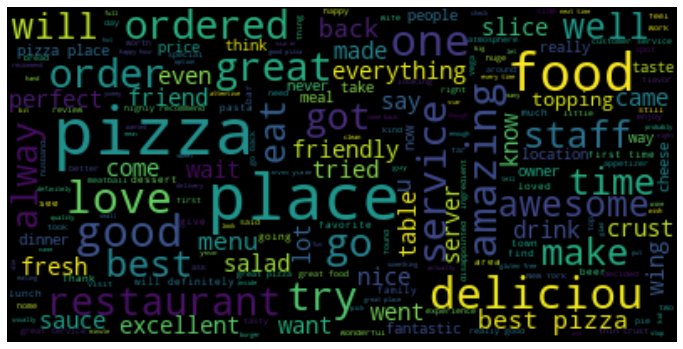

In [253]:
#Visualize most frequent words for the best restaurant
pizza_text = ' '.join(pizza[pizza.stars == 5].text)
pizza_text_wd = WordCloud(max_font_size=40).generate(pizza_text)

plt.figure(figsize = (12,12))
plt.imshow(pizza_text_wd, interpolation="bilinear")
plt.axis("off")
plt.show()

# Review Stars Chaning with Time

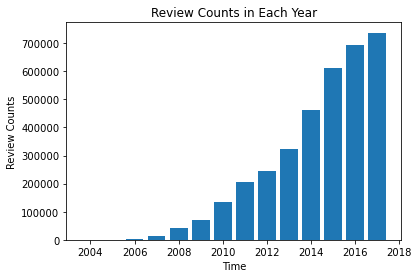

In [233]:
#Count reviews for each year
review_number = y_review.groupby(y_review.date.dt.year)['review_id'].count()

#Show reviews counts for each year
plt.plot(figsize = (6,6))
plt.bar(review_number.index,review_number.values)
plt.title('Review Counts in Each Year')
plt.ylabel('Review Counts')
plt.xlabel('Time')
plt.show()

Text(0, 0.5, 'Review Stars')

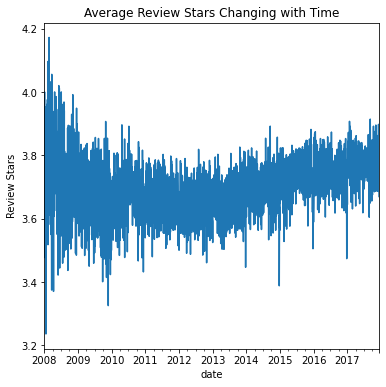

In [234]:
#Remove date before 2008 (too little comments)
date = pd.to_datetime("Jan 1th 2008")
y_review_2 = y_review[y_review.date >= date]

#Plot the Average Review Stars Changing with Time
data_y = y_review_2.groupby(y_review_2.date)['stars'].mean()
data_y.plot(figsize = (6,6))
plt.title('Average Review Stars Changing with Time')
plt.ylabel('Review Stars')